# Visualisations of some basic satistics for classes

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def compare_classes(labels: set):
    """
    Parameters:
    labels (set): set of labels of classes one wishes to compare
    """

    df_labels = pd.read_csv('../data/stats_by_label.csv')
    df_labels = df_labels[df_labels['label'].isin(labels)]
    df_labels = df_labels.sort_values(by='count', ascending=False)
    df_all = pd.read_csv('../data/stats_all.csv')
    df_all = df_all[df_all['label'].isin(labels)]
    df_all = df_all.join(df_labels[['label', 'count']].set_index('label'), on = 'label')
    df_all = df_all.sort_values(by = 'count', ascending = False)

    titles = ['Comparison of number of blobs in given classes',
    'Comparison of maximal of number of voxels in blobs of given classes',
    'Comparison of distribution of percentage of nonzero voxels in blobs of given classes',
    'Comparison of distibution of mean values of nonzero voxels of blobs in given classes',
    'Comparison of minimal and maximal value of nonzero voxels in blobs of given classes']

    f, axes = plt.subplots(5, 1, figsize = (10, 35))
    plt.rcParams.update({'font.size': 12})
    plt.style.context('seaborn-deep')
    color = 'lightblue'

    for i in range(len(axes)):
        axes[i].set_title(titles[i])
        axes[i].tick_params(labelrotation = 30)

    sns.barplot(x = 'label', y = 'count', data = df_labels, ax = axes[0], color = color)

    sns.barplot(x = 'label', y = 'blob_n_max', data = df_labels, ax = axes[1], color = color)

    sns.violinplot(x = 'label', y = 'nonzero_%', data = df_all, ax = axes[2], cut = 0, color = color)

    columns = ['label', 'nonzero_min_min', 'nonzero_max_max']
    table = axes[4].table(cellText = df_labels[columns].round(3).values, colLabels = columns, loc = 'center')
    table.scale(1, 2)
    table.set_fontsize(12)
    axes[4].axis('off')

    sns.violinplot(x = 'label', y = 'nonzero_mean', data = df_all, ax = axes[3], cut = 0, color = color)
        
    f.tight_layout() 


In [3]:
def info_class(label: str):
    """
    Parameters:
    label(str): name of the class one wants to gain information about
    """
    
    df_labels = pd.read_csv('../data/stats_by_label.csv')
    all_blobs = df_labels[['count']].sum()
    df_labels = df_labels[df_labels['label']==label]
    df_all = pd.read_csv('../data/stats_all.csv')
    df_all = df_all[df_all['label']==label]
    columns = ['blob_n', 'nonzero_%', 'nonzero_mean', 'nonzero_median']
    titles = ['Percentage of blobs in class'+ label, 
        'Basic information about class '+ label, 
        'Distribution of number of all voxels in blobs of class '+ label,
        'Distribution of percentage of nonzero voxels in blobs of class '+ label,
        'Distribution of mean value of nonzero voxels in blobs of class '+ label,
        'Distribution of median of nonzero voxels in blobs of class '+ label]

    f, axes = plt.subplots(6, 1, figsize = (10, 35))
    plt.rcParams.update({'font.size': 12})
    plt.style.context('seaborn-deep')

    labels = [label, 'rest']
    values = [int(df_labels['count']), all_blobs]

    axes[0].pie(values, labels = labels, colors = ['darkgreen', 'gray'], startangle = 90)
    axes[0].axis('equal')
    axes[0].set_title(titles[0])

    cols = ['label', 'count', 'blob_n_min','blob_n_max', 'nonzero_min_min', 'nonzero_max_max']
    df_table = df_labels[cols].round(3)
    table = axes[1].table(cellText = df_table.values, colLabels = cols, loc = 'center')
    table.scale(1, 2)
    axes[1].axis('off')
    axes[1].set_title(titles[1])

    
    for i in range (len(columns)):
        sns.histplot(x = columns[i], stat = 'count', data = df_all, ax = axes[i+2], color = 'darkgreen')
        axes[i+2].set_title(titles[i+2])

    f.tight_layout() 



## Comparison of top ten frequent classes

In [4]:
df_labels = pd.read_csv('../data/stats_by_label.csv')

df_labels_top10 = df_labels.sort_values(by='count', ascending=False).iloc[:10]
labels_top10 = set(df_labels_top10['label'])

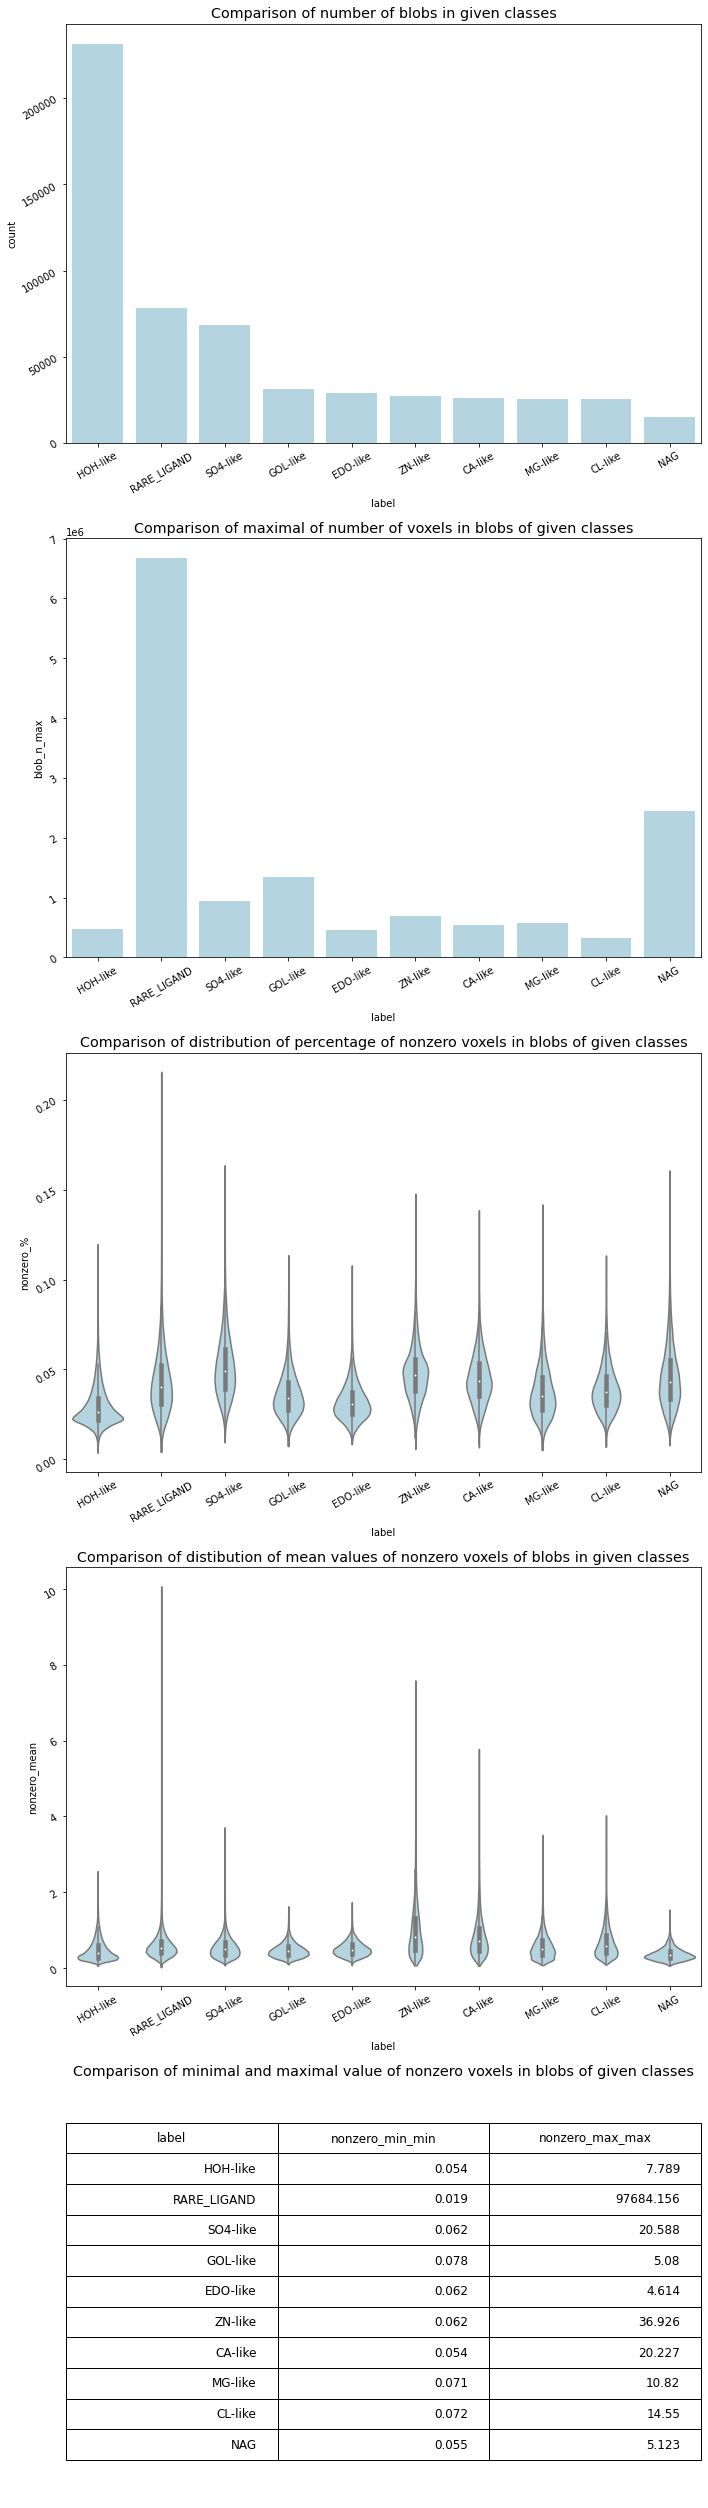

In [5]:
compare_classes(labels_top10)

## Statistics for ten most frequent classes

### HOH-like

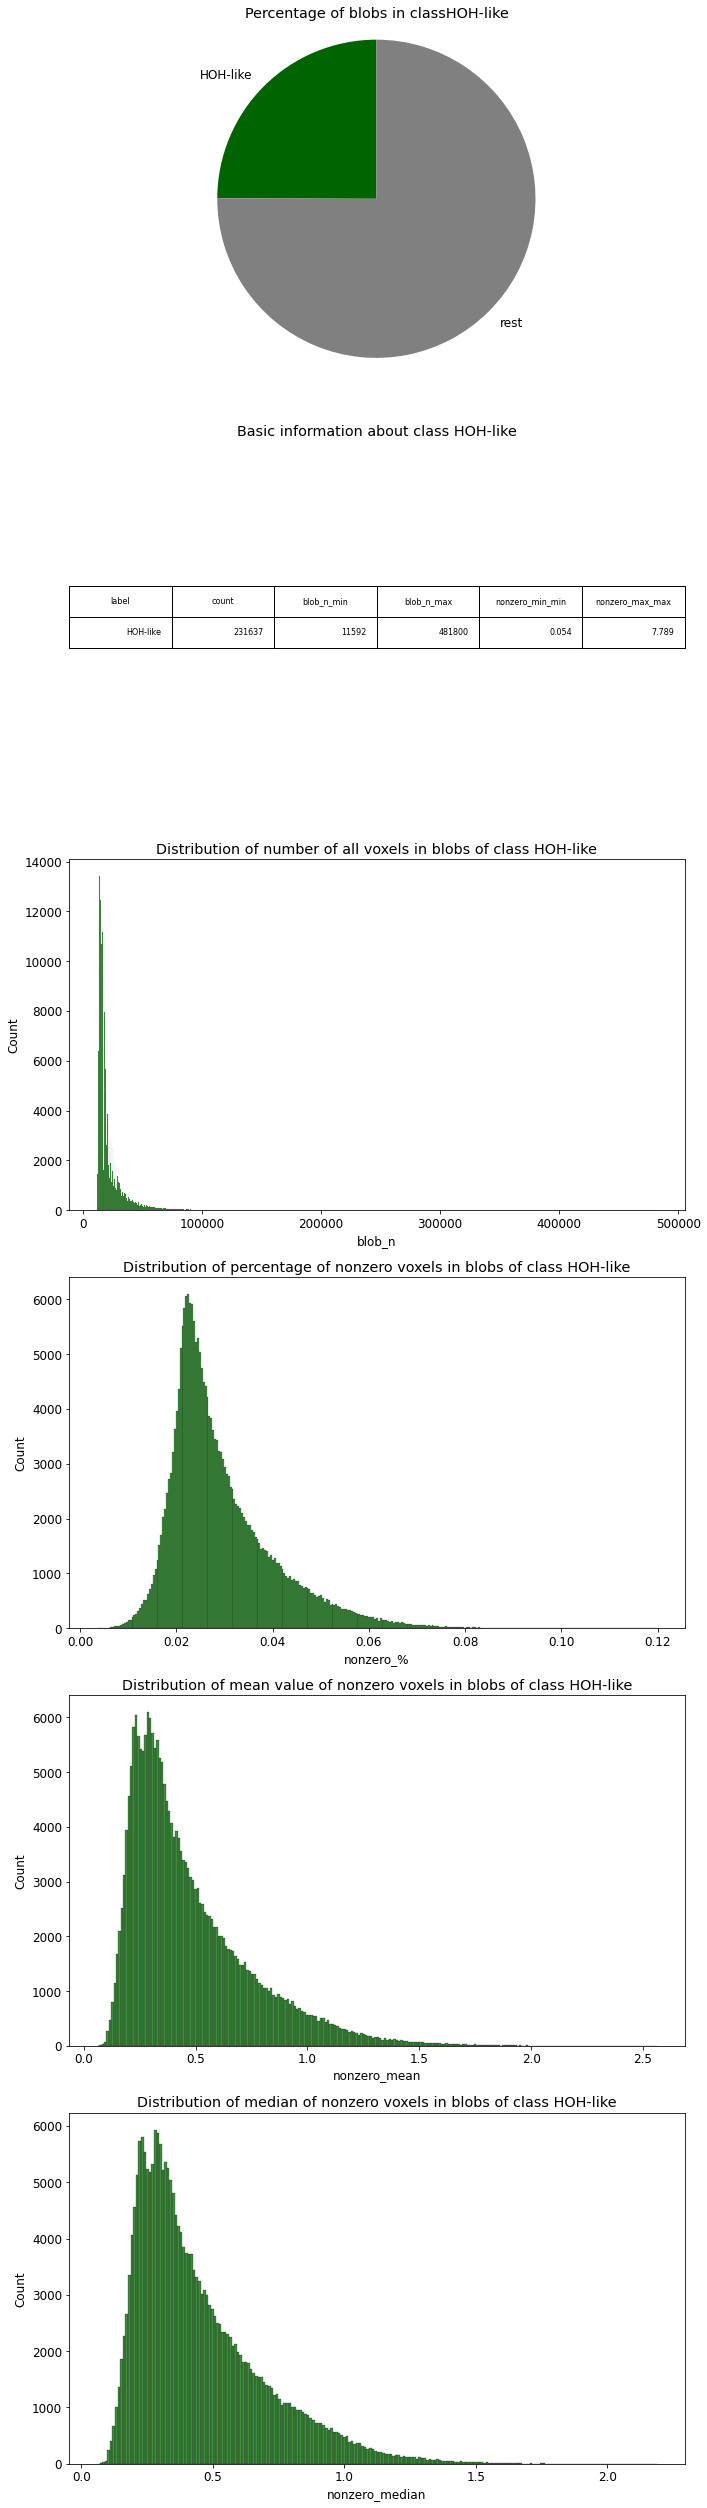

In [6]:
info_class('HOH-like')

### RARE_LIGAND

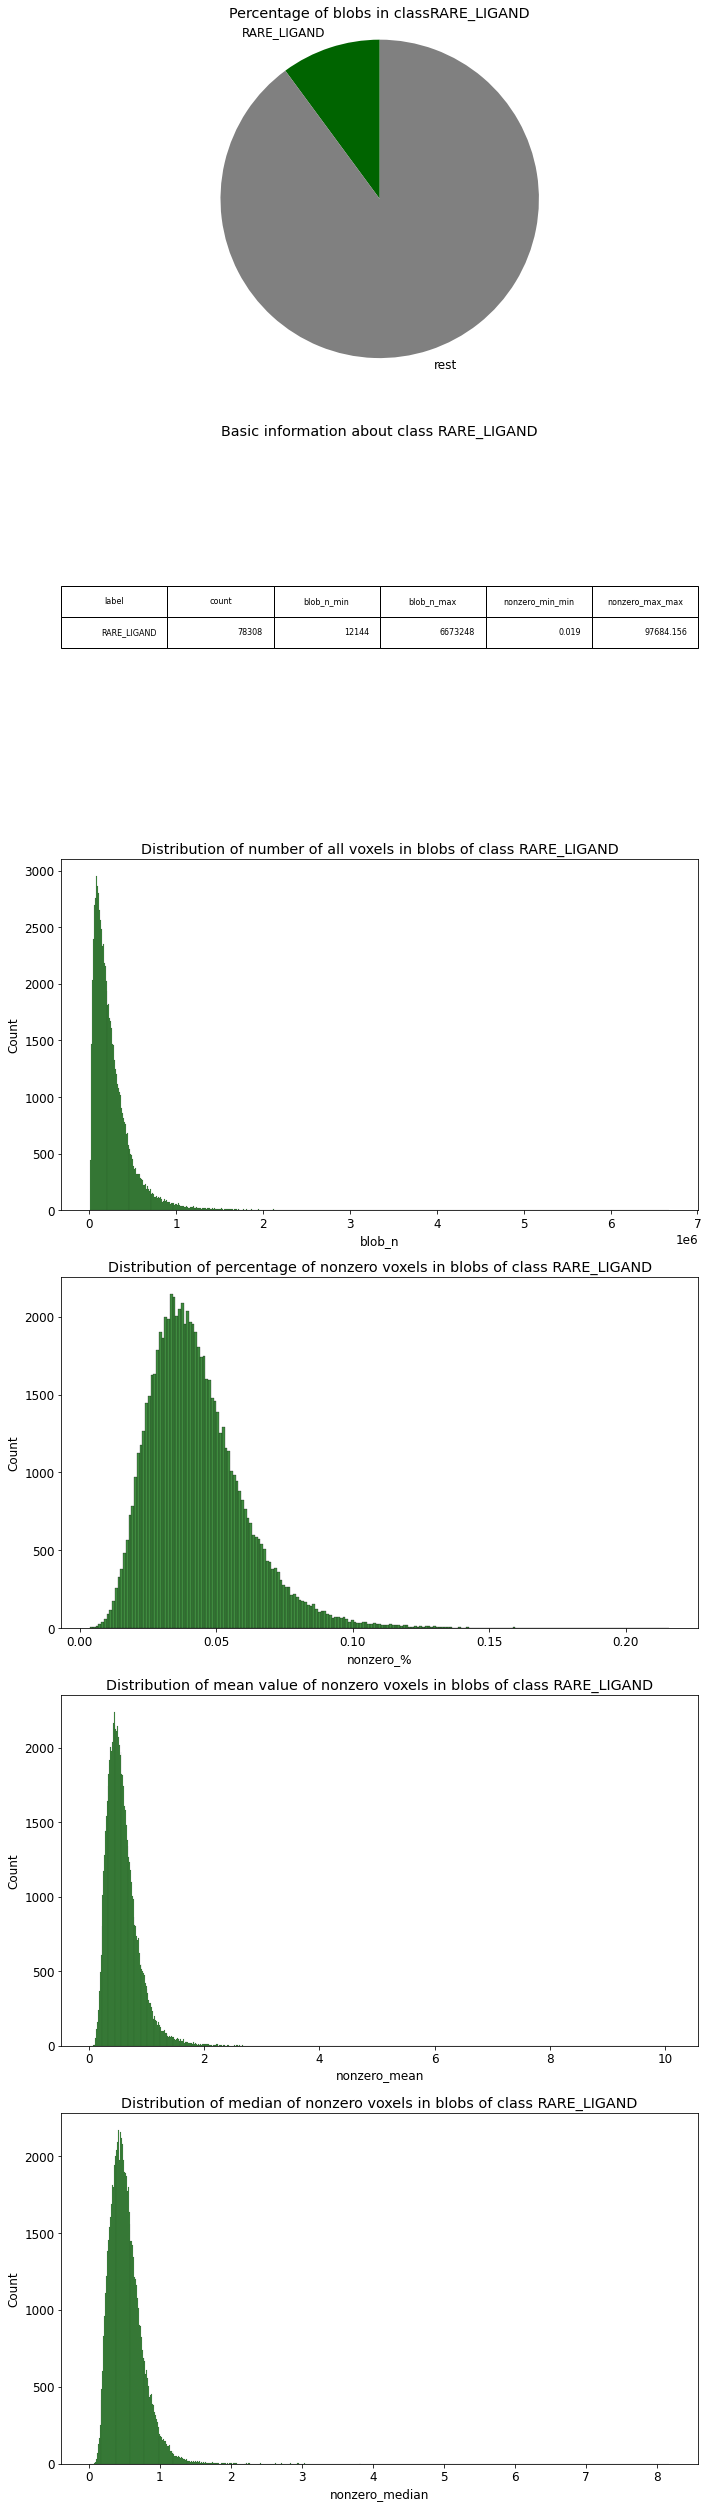

In [7]:
info_class('RARE_LIGAND')

### SO4-like

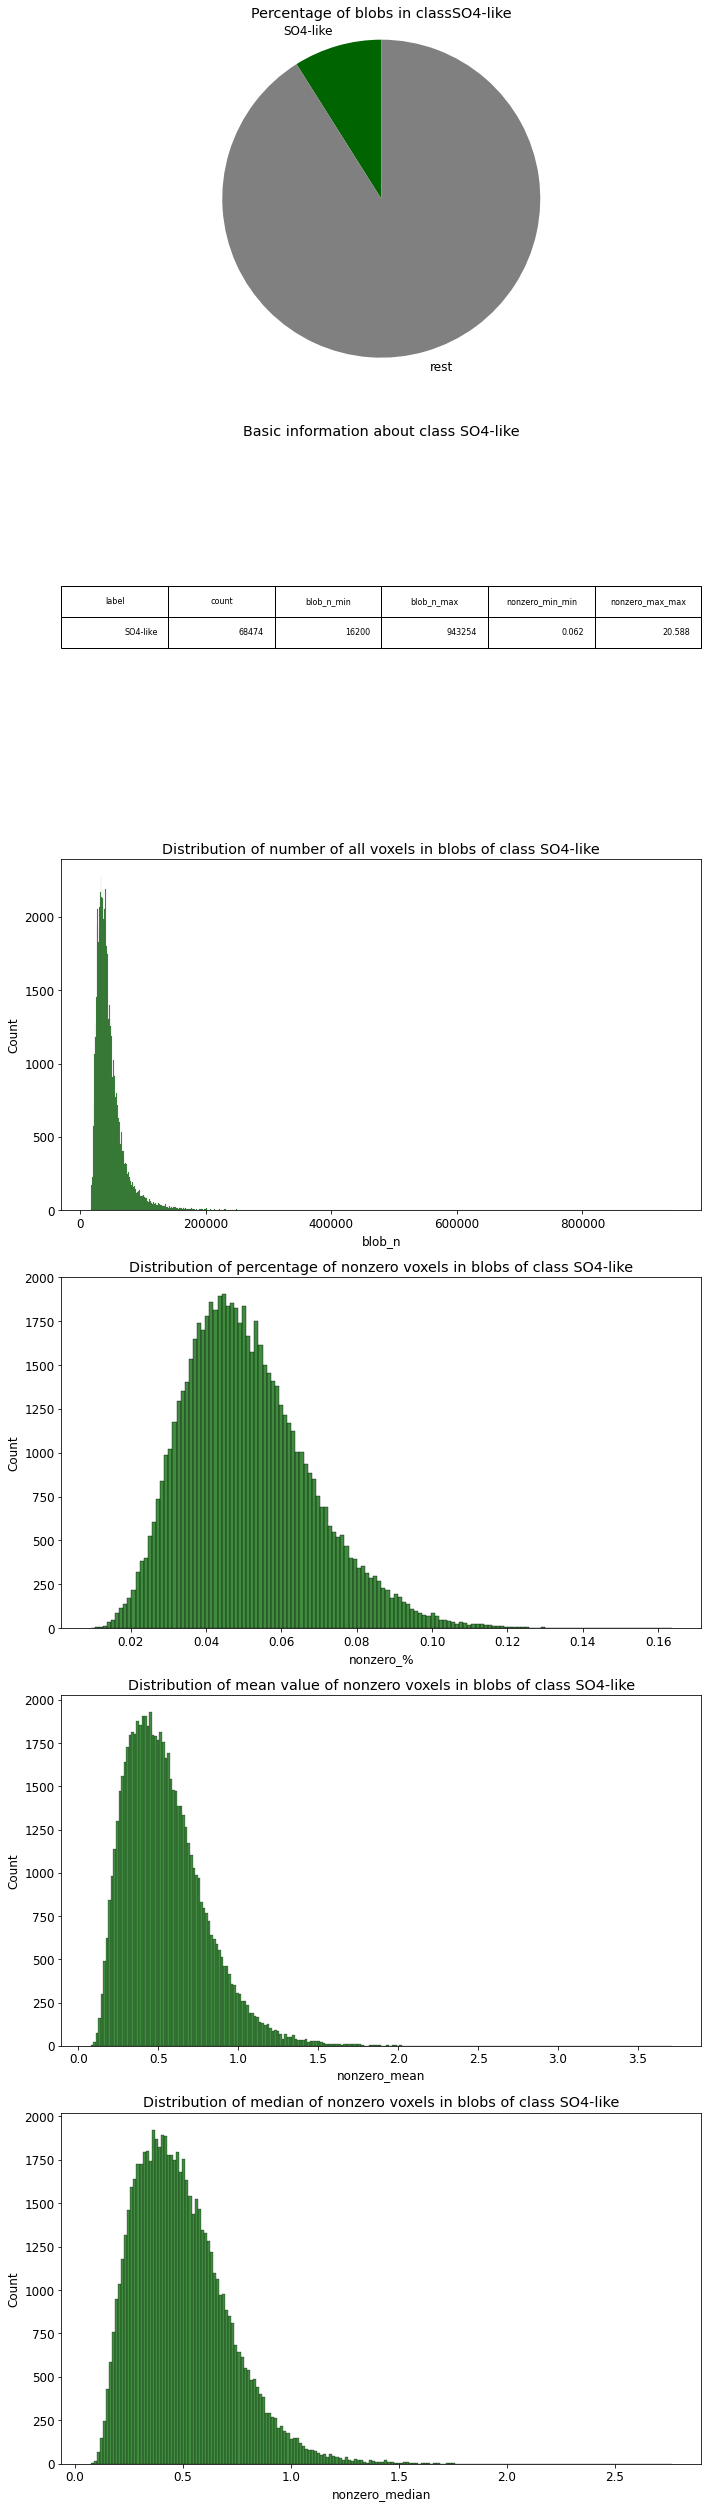

In [8]:
info_class('SO4-like')

### GOL-like

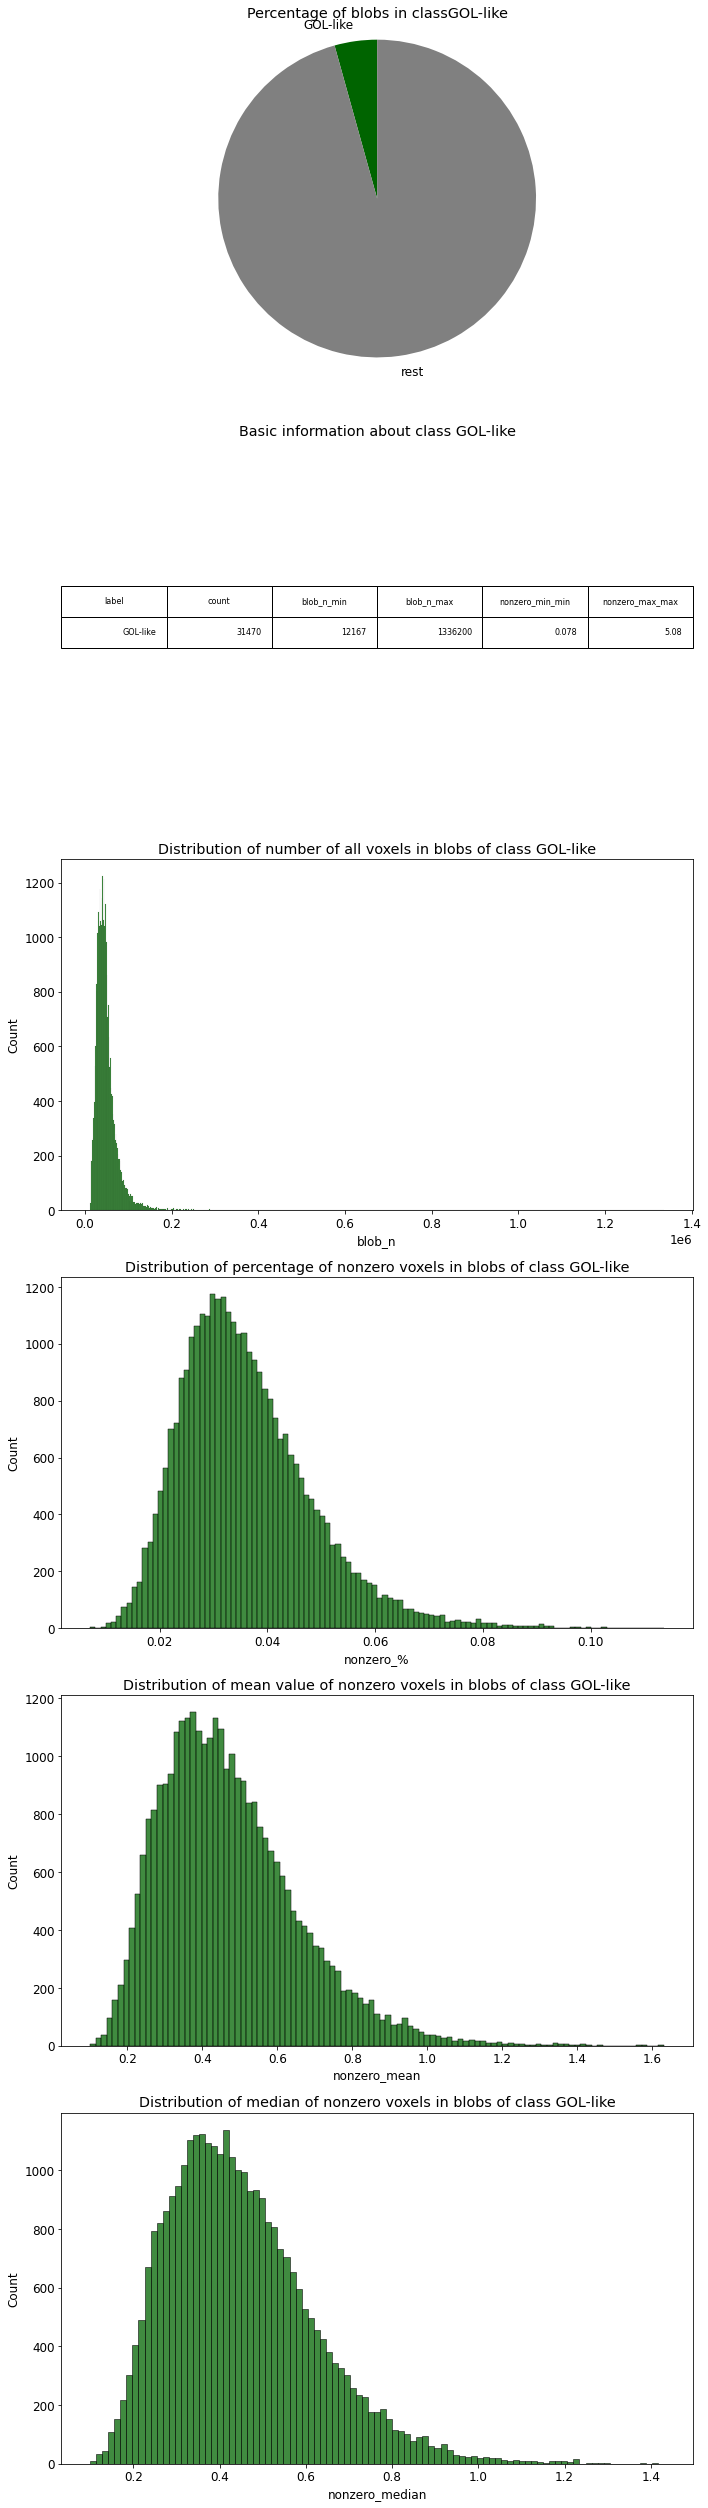

In [9]:
info_class('GOL-like')

### EDO-like

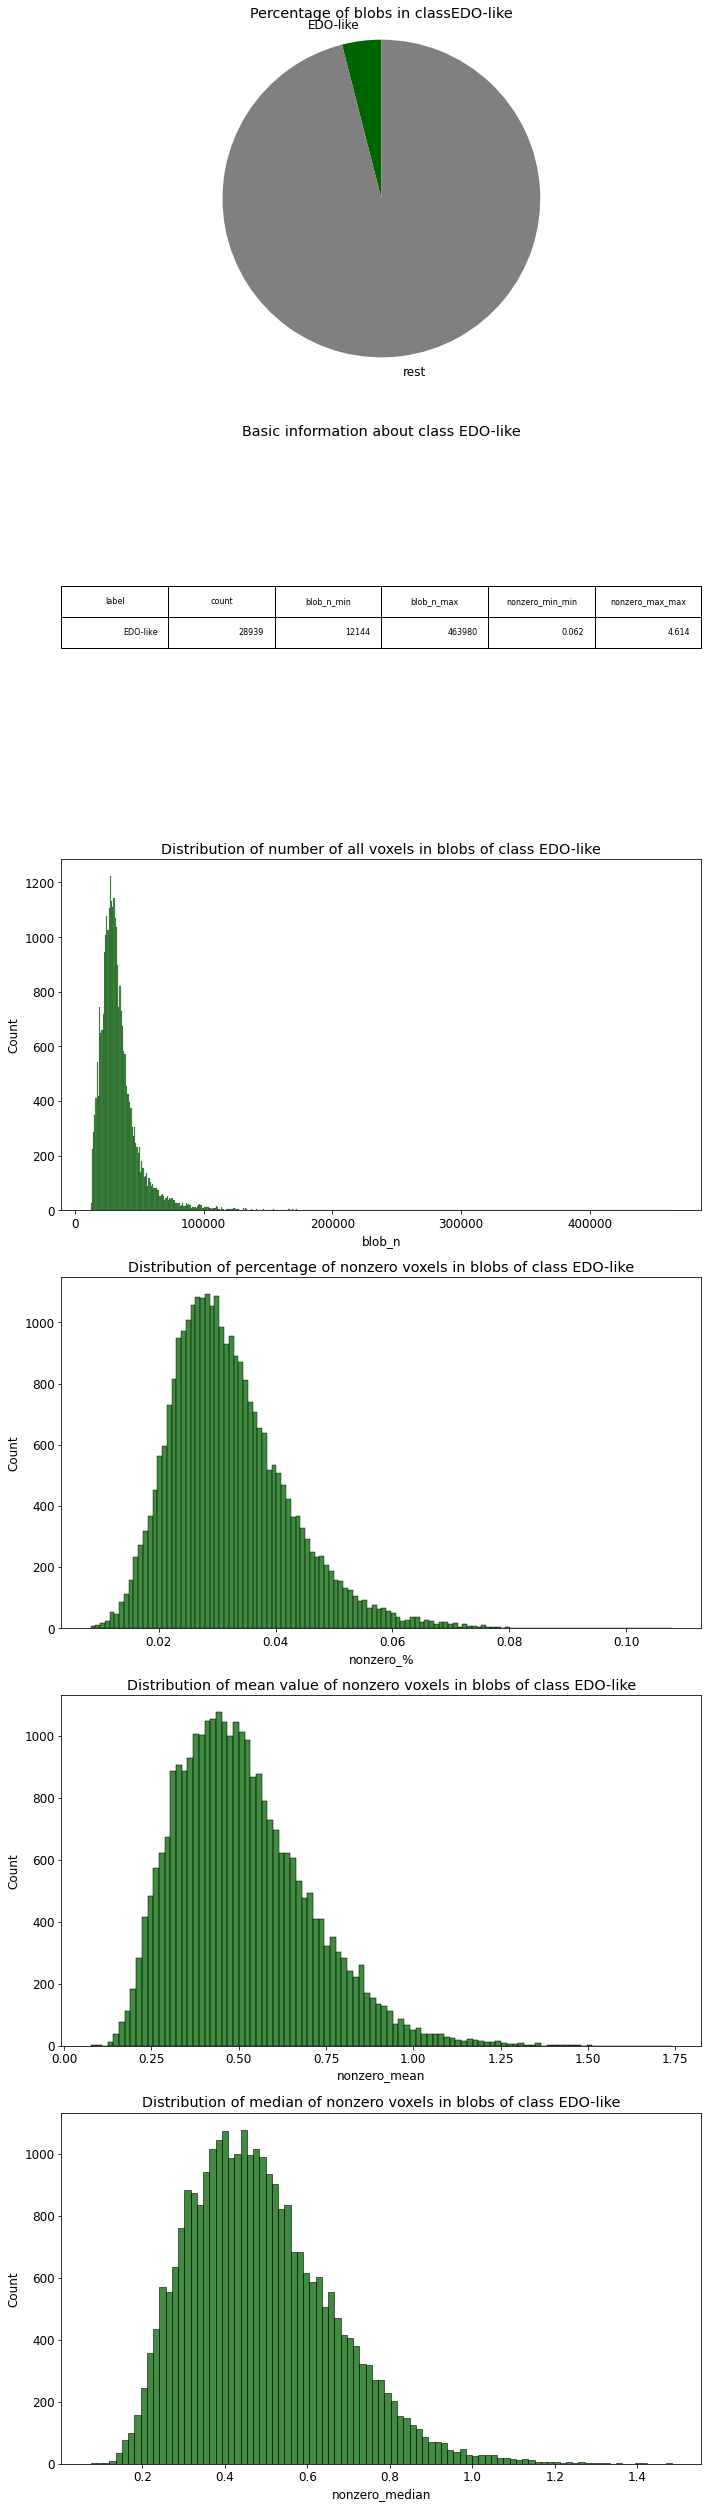

In [10]:
info_class('EDO-like')

### ZN-like

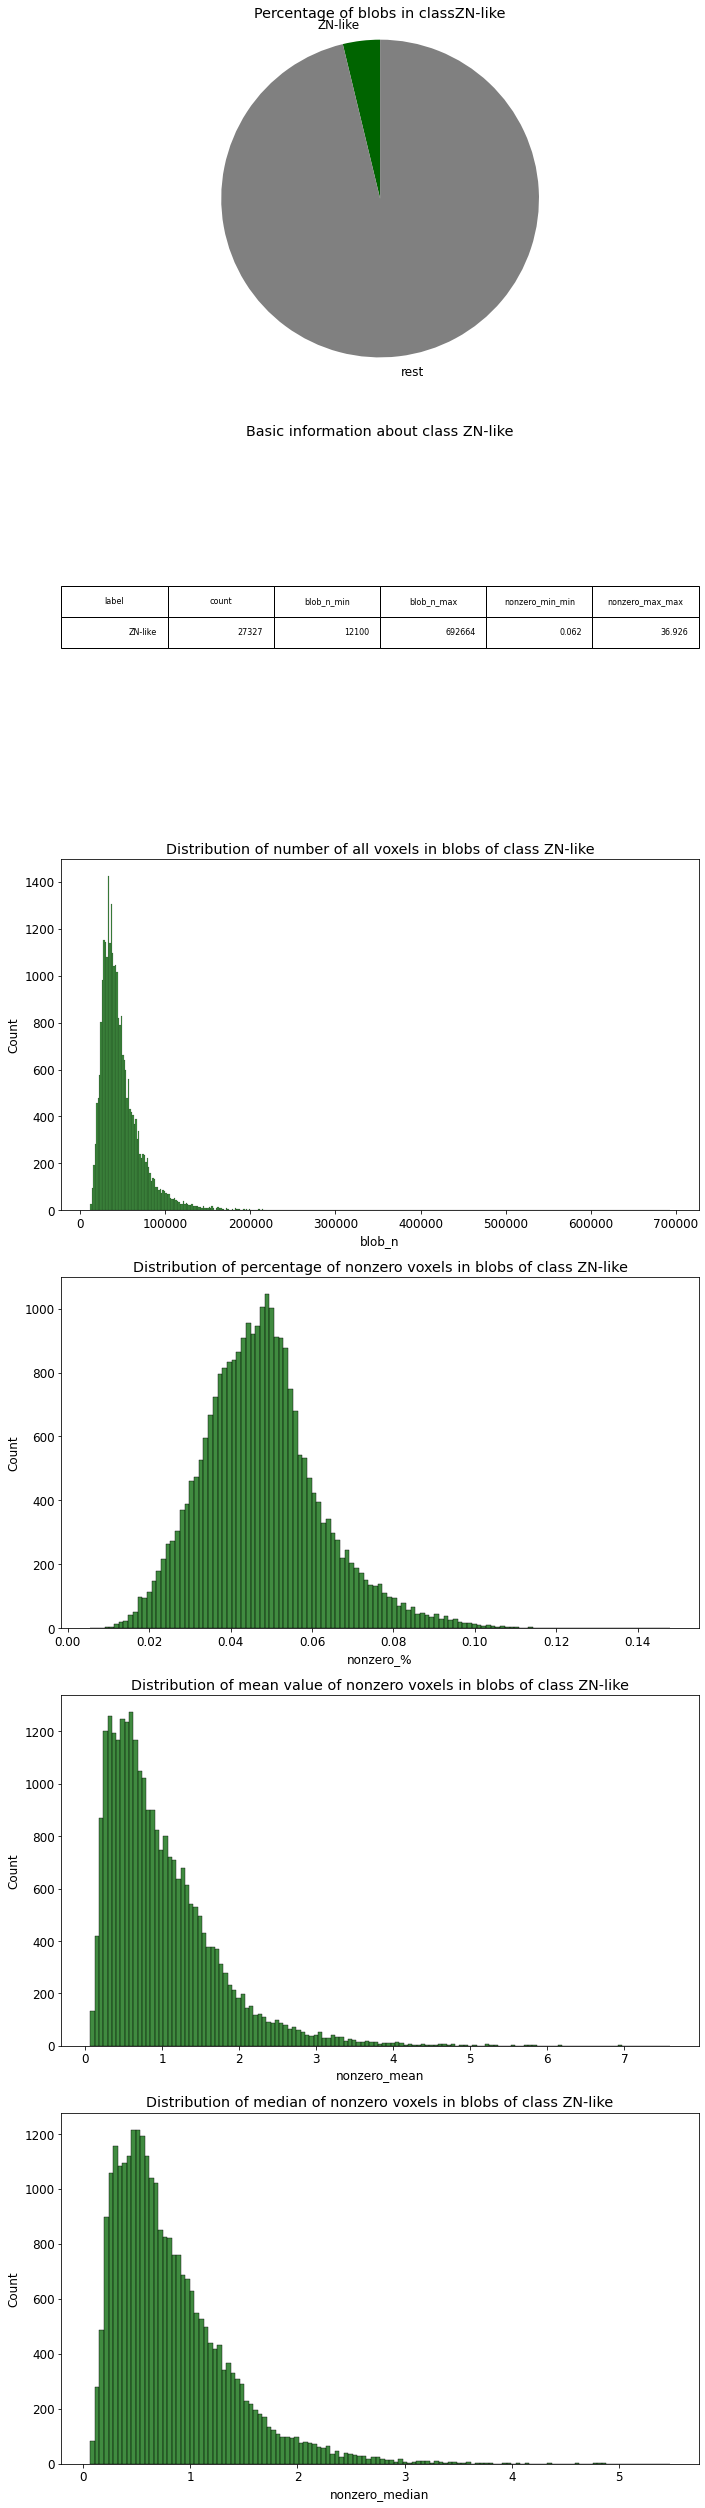

In [11]:
info_class('ZN-like')

### CA-like

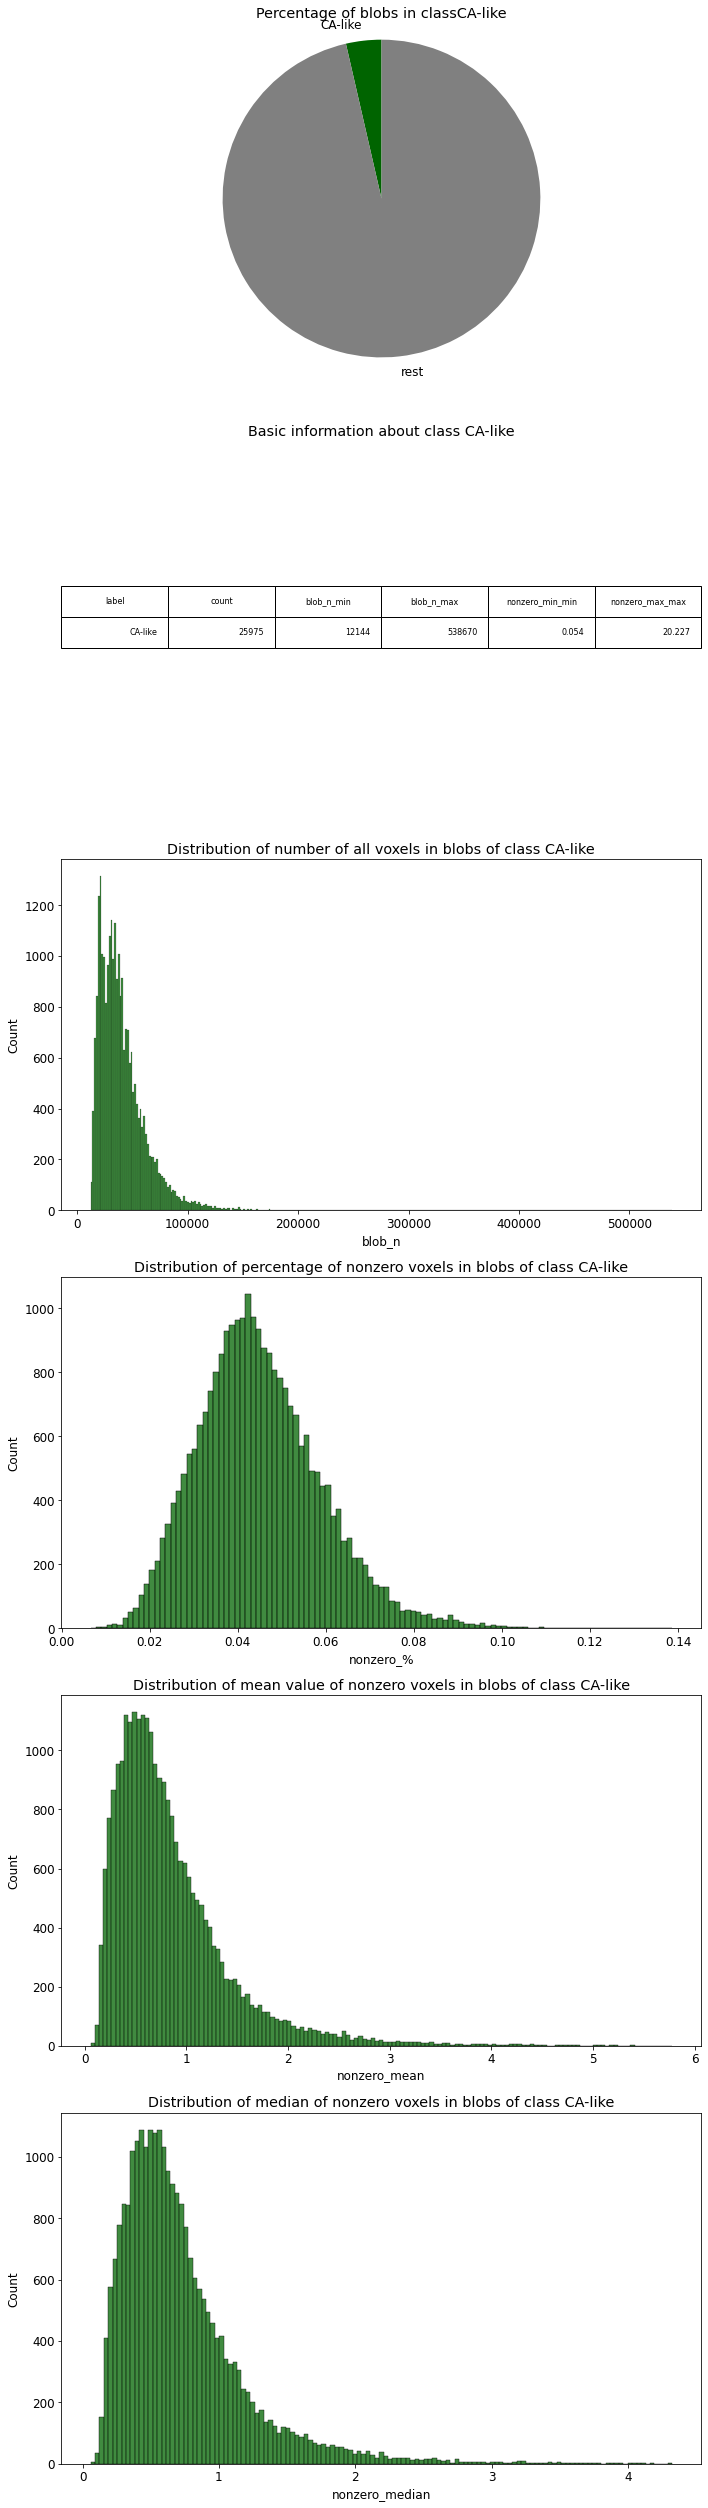

In [12]:
info_class('CA-like')

### MG-like

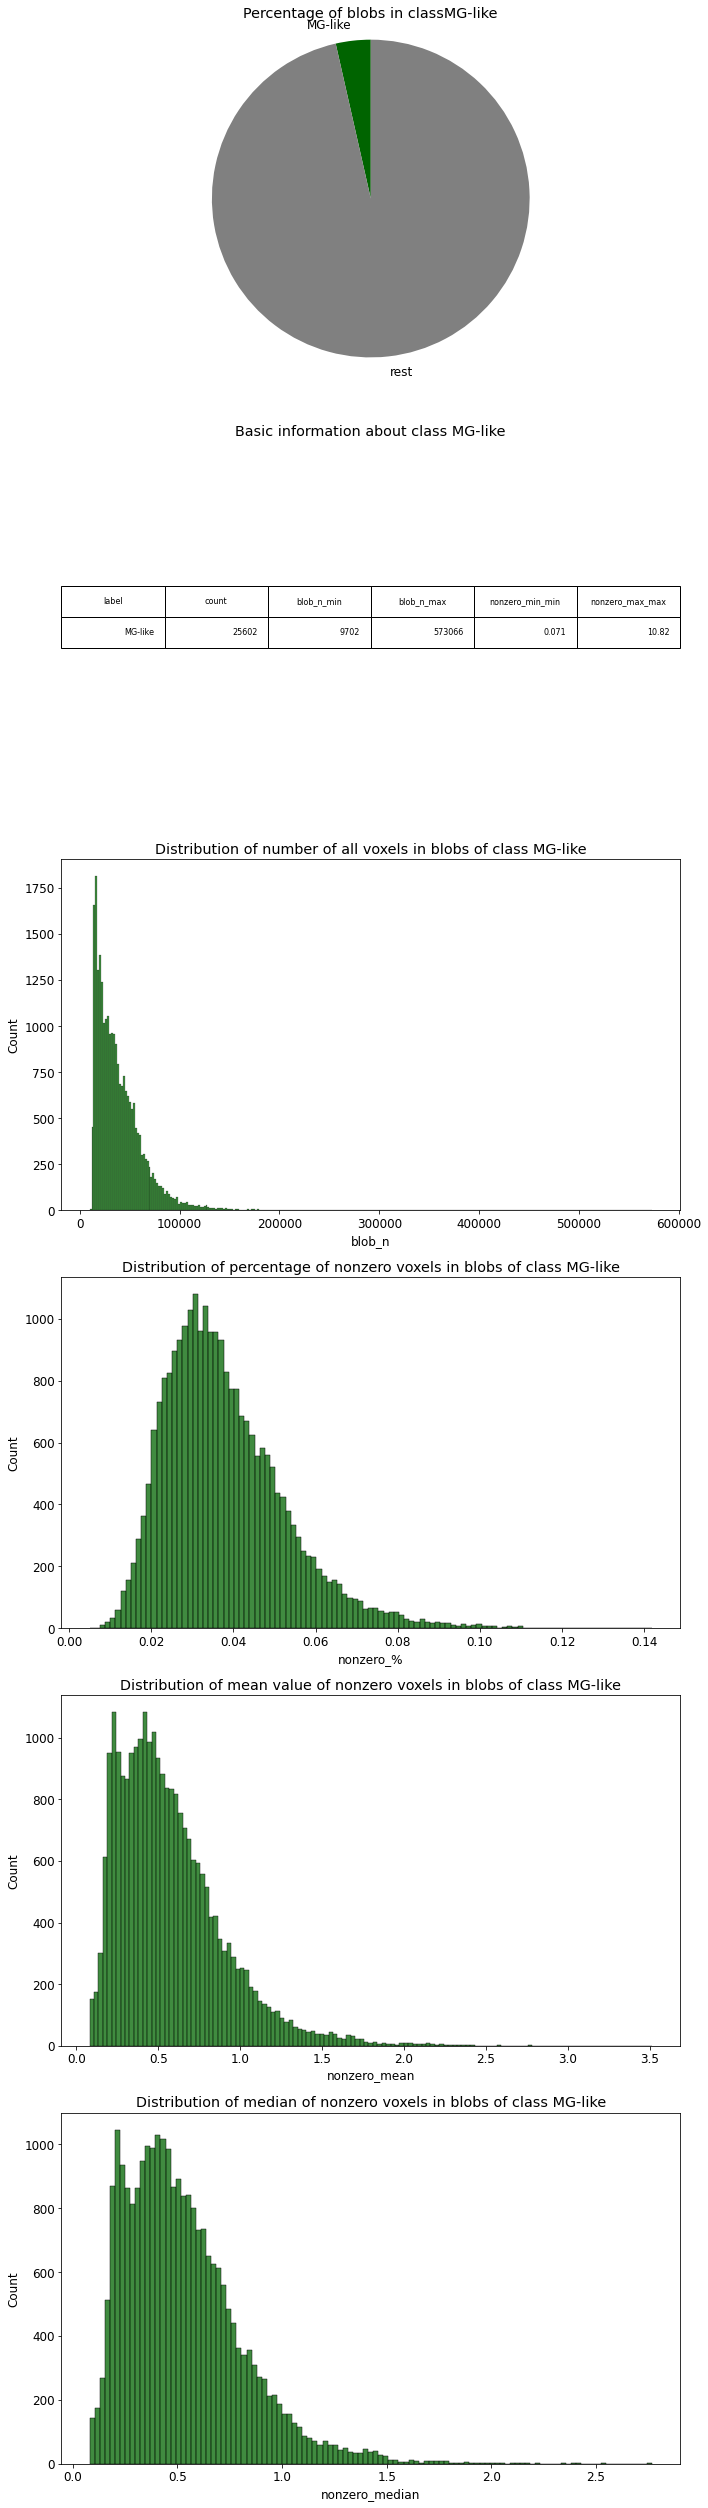

In [13]:
info_class('MG-like')

### CL-like

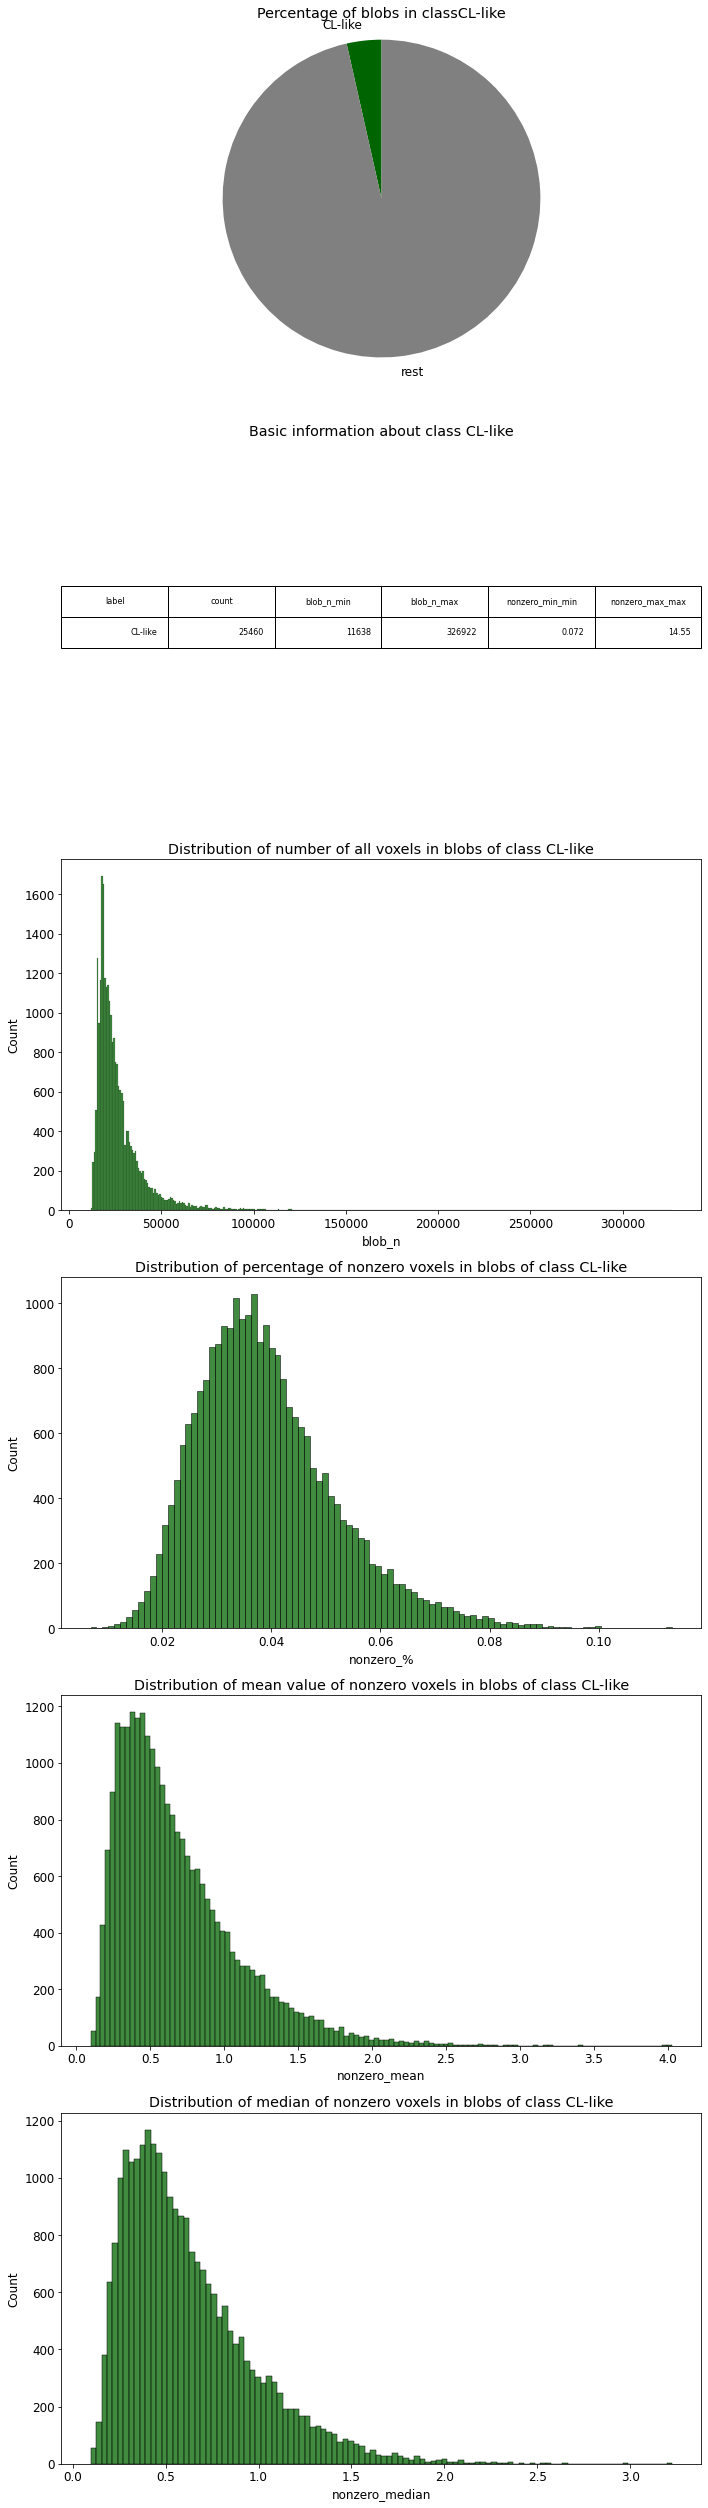

In [14]:
info_class('CL-like')

### NAG

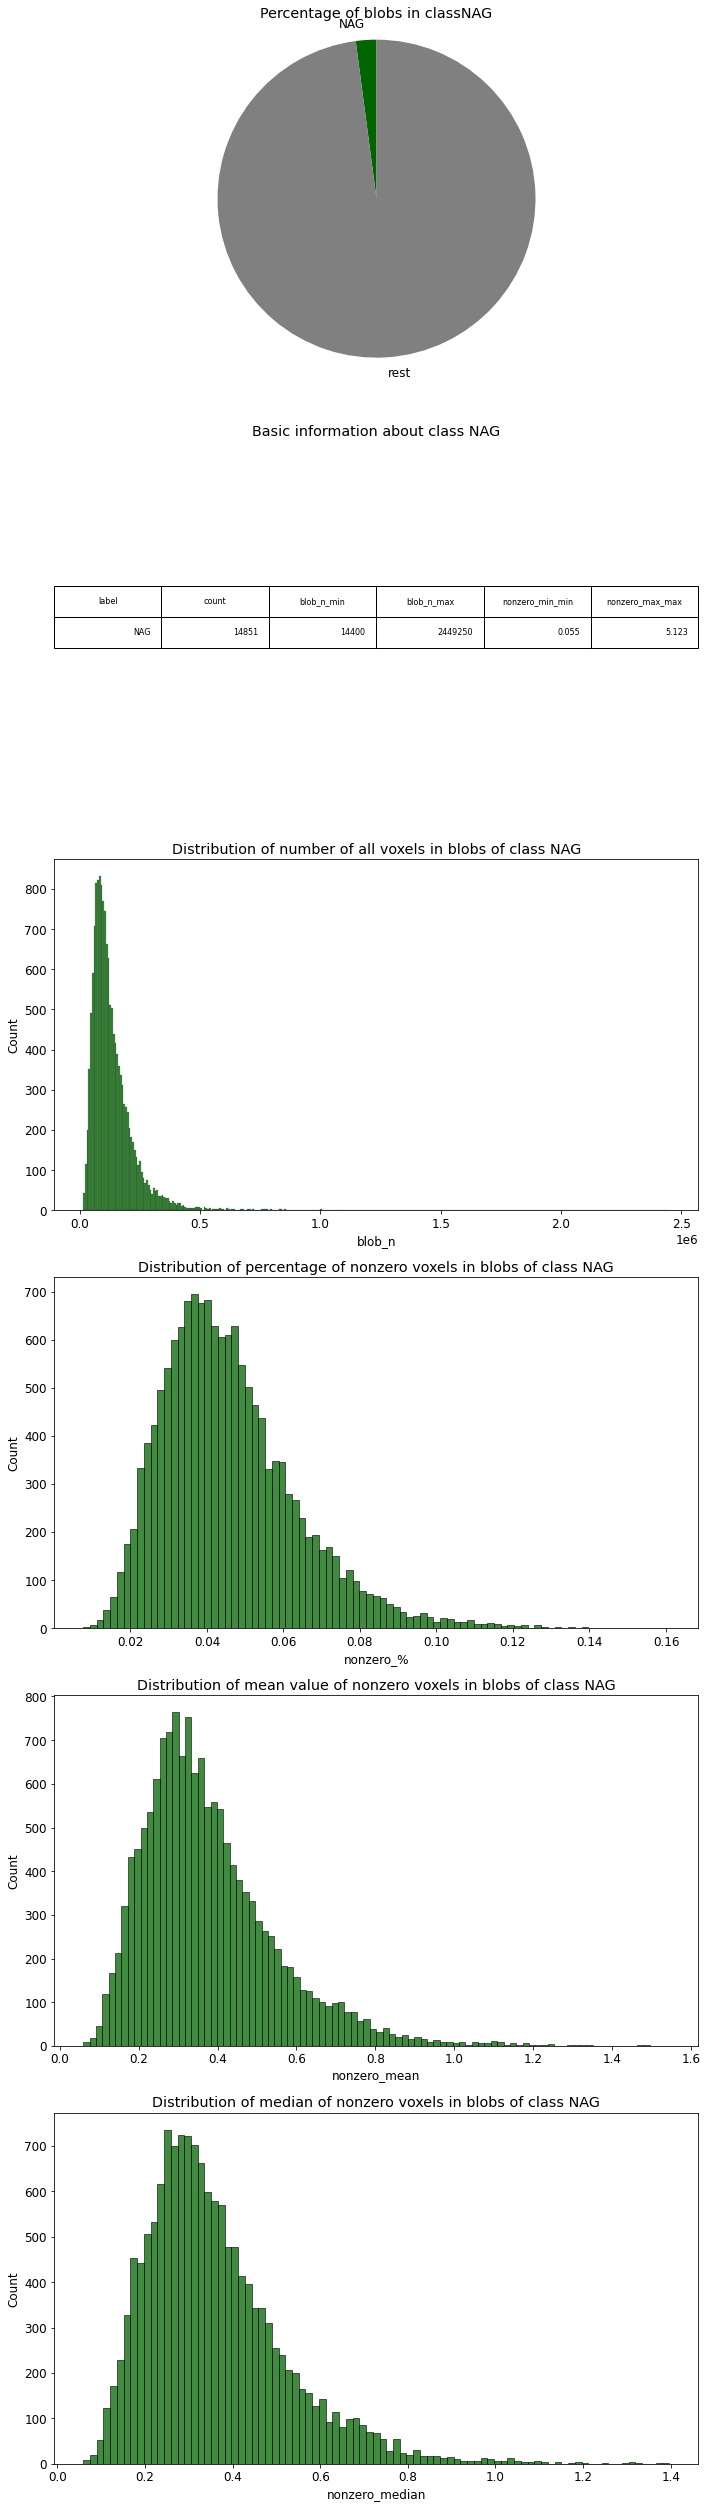

In [15]:
info_class('NAG')